## Read data and basic data clean-up

In [16]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
import cv2
import tensorflow as tf
import time
import dateutil
import sklearn.metrics as sm

In [17]:
PATH='energydata_complete.csv'
data = pd.read_csv(PATH)
data.columns = [x.lower() for x in data.columns]
data.head(5)

date  appliances  lights         t1       rh_1         t2  \
0  14/02/2016 0:00          50      10  21.790000  39.900000  20.100000   
1  14/02/2016 0:10          50       0  21.790000  39.900000  20.033333   
2  14/02/2016 0:20          60      10  21.700000  39.933333  19.890000   
3  14/02/2016 0:30          40       0  21.633333  39.860000  19.890000   
4  14/02/2016 0:40          60      10  21.600000  39.900000  19.790000   

    rh_2     t3   rh_3    t4  ...    t9       rh_9  t_out  press_mm_hg  \
0  40.79  21.39  40.59  19.2  ...  18.0  41.933333   2.90       732.90   
1  40.73  21.39  40.59  19.2  ...  18.0  42.133333   2.87       732.95   
2  40.79  21.39  40.53  19.2  ...  18.0  42.360000   2.83       733.00   
3  40.79  21.39  40.59  19.2  ...  18.0  42.633333   2.80       733.05   
4  40.79  21.39  40.59  19.1  ...  18.0  42.860000   2.77       733.10   

      rh_out  windspeed  visibility  tdewpoint        rv1        rv2  
0  98.000000   2.000000        31.0        2.6  48.320978  48.320978  
1  98.166667   2.166667        28.5        2.6  33.339359  33.339359  
2  98.333333   2.333333        26.0        2.6   8.168115   8.168115  
3  98.500000   2.500000        23.5        2.6  16.197509  16.197509  
4  98.666667   2.666667        21.0        2.6  12.559574  12.559574  

[5 rows x 29 columns]

In [18]:
data.isnull().sum().sort_values(ascending=False)

date           0
appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [19]:
data.apply(lambda x: len(x.unique()))

date           14941
appliances        87
lights             6
t1               627
rh_1            2277
t2              1548
rh_2            3162
t3              1189
rh_3            2087
t4              1168
rh_4            2586
t5              1483
rh_5            5057
t6              4084
rh_6            8167
t7              1329
rh_7            3893
t8              1361
rh_8            4104
t9               816
rh_9            3040
t_out            969
press_mm_hg     1900
rh_out           566
windspeed        175
visibility       398
tdewpoint       1029
rv1            14941
rv2            14941
dtype: int64

In [20]:
data.describe()

appliances        lights            t1          rh_1            t2  \
count  14941.000000  14941.000000  14941.000000  14941.000000  14941.000000   
mean      96.747206      3.235393     22.030776     39.418672     20.519140   
std       97.297111      7.296554      1.469766      3.880367      2.322643   
min       10.000000      0.000000     18.600000     27.023333     16.200000   
25%       50.000000      0.000000     21.000000     36.790000     18.890000   
50%       60.000000      0.000000     21.823333     38.790000     20.000000   
75%      100.000000      0.000000     22.890000     41.400000     21.830000   
max      900.000000     50.000000     26.260000     57.496667     29.856667   

               rh_2            t3          rh_3            t4          rh_4  \
count  14941.000000  14941.000000  14941.000000  14941.000000  14941.000000   
mean      39.935868     22.770465     38.046386     21.425985     37.701517   
std        4.328421      1.897689      2.530175      1.843571      3.701348   
min       20.463333     19.100000     28.766667     17.290000     27.660000   
25%       37.260000     21.390000     36.363333     20.100000     34.900000   
50%       39.900000     22.566667     37.760000     21.166667     37.200000   
75%       42.700000     24.033333     39.260000     22.738571     39.700000   
max       56.026667     29.236000     47.693333     26.200000     50.760000   

       ...            t9          rh_9         t_out   press_mm_hg  \
count  ...  14941.000000  14941.000000  14941.000000  14941.000000   
mean   ...     20.143157     40.454742      8.182569    755.575393   
std    ...      1.782497      3.566295      5.464633      6.613943   
min    ...     17.260000     29.166667     -4.400000    732.900000   
25%    ...     18.571429     38.030000      4.230000    751.200000   
50%    ...     20.000000     39.863333      7.630000    755.700000   
75%    ...     20.890000     42.530000     11.400000    760.200000   
max    ...     24.500000     51.536000     26.100000    772.300000   

             rh_out     windspeed    visibility     tdewpoint           rv1  \
count  14941.000000  14941.000000  14941.000000  14941.000000  14941.000000   
mean      77.559434      3.671039     37.922696      4.055227     25.047636   
std       15.720014      2.218070     11.415145      4.220123     14.436670   
min       24.000000      0.000000      1.000000     -6.100000      0.005322   
25%       66.666667      2.000000     29.000000      0.983000     12.593007   
50%       80.833333      3.166667     40.000000      3.600000     25.120708   
75%       90.833333      5.000000     40.000000      6.900000     37.454428   
max      100.000000     13.000000     66.000000     15.500000     49.992758   

                rv2  
count  14941.000000  
mean      25.047636  
std       14.436670  
min        0.005322  
25%       12.593007  
50%       25.120708  
75%       37.454428  
max       49.992758  

[8 rows x 28 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         14941 non-null  object 
 1   appliances   14941 non-null  int64  
 2   lights       14941 non-null  int64  
 3   t1           14941 non-null  float64
 4   rh_1         14941 non-null  float64
 5   t2           14941 non-null  float64
 6   rh_2         14941 non-null  float64
 7   t3           14941 non-null  float64
 8   rh_3         14941 non-null  float64
 9   t4           14941 non-null  float64
 10  rh_4         14941 non-null  float64
 11  t5           14941 non-null  float64
 12  rh_5         14941 non-null  float64
 13  t6           14941 non-null  float64
 14  rh_6         14941 non-null  float64
 15  t7           14941 non-null  float64
 16  rh_7         14941 non-null  float64
 17  t8           14941 non-null  float64
 18  rh_8         14941 non-null  float64
 19  t9  

----------------------------------------------------------------------------------------------------------------
### Inferences:
     1. There are 29 columns - 1 date time column, 2 Integer columns and 26 Float column
     2. Nearly 1 coulmn (Lights) is having less than 10 unique items, which can be considered as categorical column
     3. There are NULL values in any of the given columns
     4. Target, which is Appliances need to predicted

## Feature Engineering

Checking for Outliers and removing extreme 1% of the data.

/tmp/ipykernel_62354/2493222318.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["appliances"])


<Axes: xlabel='appliances', ylabel='Density'>

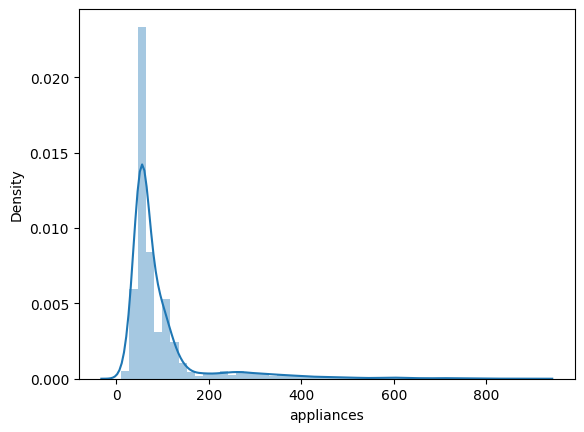

In [22]:
sns.distplot(data["appliances"])

<Axes: ylabel='appliances'>

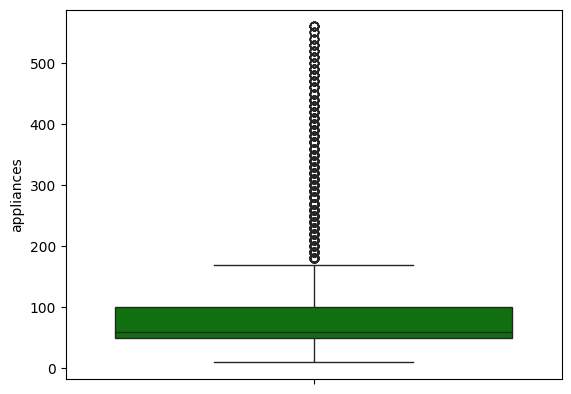

In [23]:
data = data[data['appliances'].between(data['appliances'].quantile(.0), data['appliances'].quantile(.99))]
sns.boxplot(data["appliances"],color="green")

### Injesting new features to the dataset

In [24]:
data["exact_date"]=data['date'].str.split(' ').str[0]

data["hours"]=(data['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
data["seconds"]=((data['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

data["week"]=(data['date'].str.split(' ').str[0])
data["week"]=(data['week'].apply(dateutil.parser.parse, dayfirst=True))
data["weekday"]=(data['week'].dt.dayofweek).astype(str).astype(int)
data["week"]=(data['week'].dt.day_name())

data['log_appliances'] = np.log(data.appliances)
data['hour*lights'] = data.hours * data.lights
data['hour_avg'] = list(map(dict(data.groupby('hours')["appliances"].mean()).get, data.hours))

data.head(5)

date  appliances  lights         t1       rh_1         t2  \
0  14/02/2016 0:00          50      10  21.790000  39.900000  20.100000   
1  14/02/2016 0:10          50       0  21.790000  39.900000  20.033333   
2  14/02/2016 0:20          60      10  21.700000  39.933333  19.890000   
3  14/02/2016 0:30          40       0  21.633333  39.860000  19.890000   
4  14/02/2016 0:40          60      10  21.600000  39.900000  19.790000   

    rh_2     t3   rh_3    t4  ...        rv1        rv2  exact_date  hours  \
0  40.79  21.39  40.59  19.2  ...  48.320978  48.320978  14/02/2016      0   
1  40.73  21.39  40.59  19.2  ...  33.339359  33.339359  14/02/2016      0   
2  40.79  21.39  40.53  19.2  ...   8.168115   8.168115  14/02/2016      0   
3  40.79  21.39  40.59  19.2  ...  16.197509  16.197509  14/02/2016      0   
4  40.79  21.39  40.59  19.1  ...  12.559574  12.559574  14/02/2016      0   

   seconds    week  weekday  log_appliances  hour*lights  hour_avg  
0        0  Sunday        6        3.912023            0      52.5  
1      600  Sunday        6        3.912023            0      52.5  
2     1200  Sunday        6        4.094345            0      52.5  
3     1800  Sunday        6        3.688879            0      52.5  
4     2400  Sunday        6        4.094345            0      52.5  

[5 rows x 37 columns]

## Perform analysis & model development 

### Day wise Electricity consumption

/tmp/ipykernel_62354/1610017896.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = pd.pivot_table(data,values="appliances",index=date_series, aggfunc=[np.sum],fill_value=0)
/tmp/ipykernel_62354/1610017896.py:4: FutureWarning: The provided callable <function sum at 0x7fa21496fec0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(data,values="appliances",index=date_series, aggfunc=[np.sum],fill_value=0)


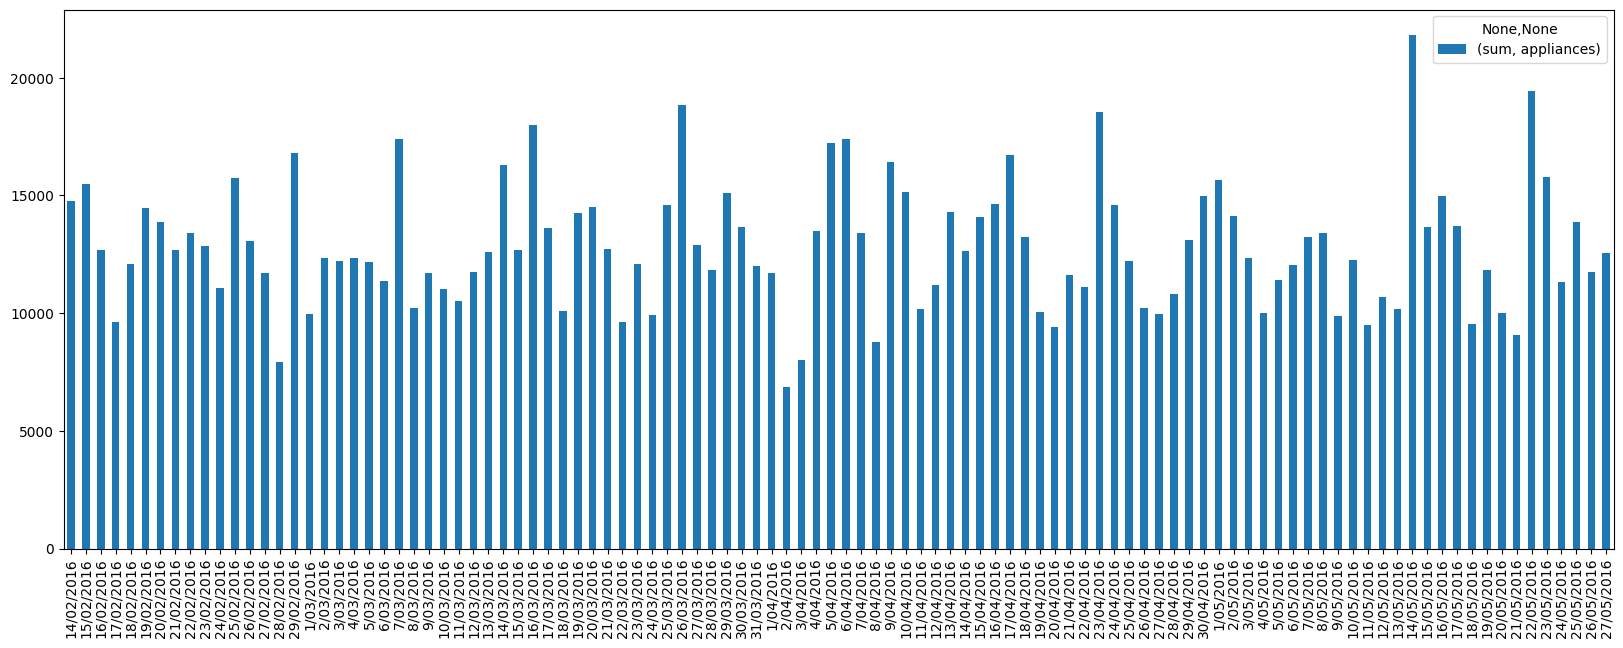

In [25]:
dates=data["exact_date"].unique()
arranged_day = pd.Categorical(data["exact_date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
table = pd.pivot_table(data,values="appliances",index=date_series, aggfunc=[np.sum],fill_value=0)
table.plot(kind="bar",figsize=(20, 7))
plt.show()

### Weekend vs Weekday?

/tmp/ipykernel_62354/2687831311.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = pd.pivot_table(data,index=["hours"],
/tmp/ipykernel_62354/2687831311.py:4: FutureWarning: The provided callable <function sum at 0x7fa21496fec0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(data,index=["hours"],


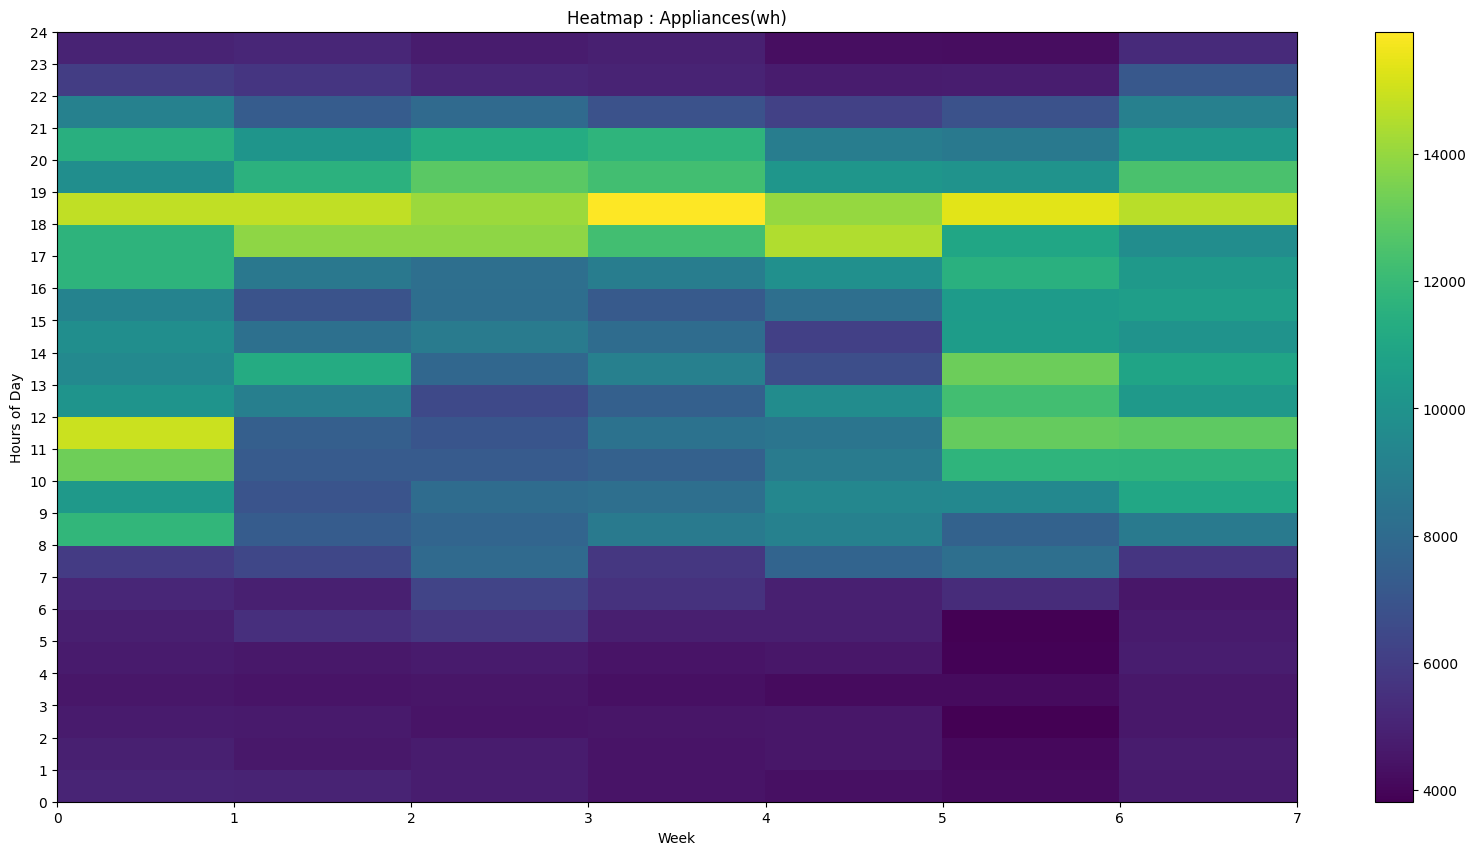

In [26]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(data["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(data,index=["hours"],
               values="appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Heatmap : Appliances(wh)')

heatmap = ax.pcolor(table)

ax.set_xlabel("Week Days")
ax.set_ylabel("Hours")

plt.colorbar(heatmap)
ax.set_yticks(range(len(table.index)+1))
ax.set_xticks(range(len(table.columns)+1))

plt.xlabel("Week")
plt.ylabel("Hours of Day")
plt.show()

<Axes: >

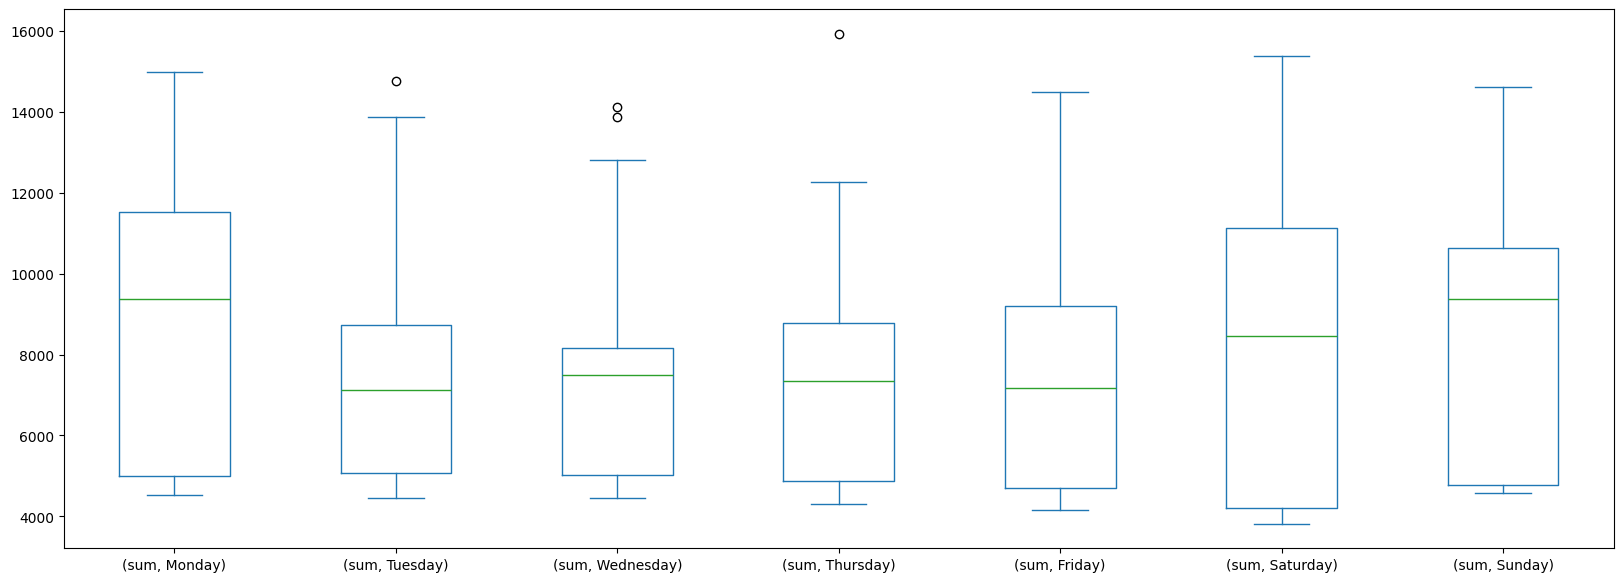

In [27]:
table.plot.box(figsize=(20, 7))

Weekends (Saturdays and Sundays) are observed to have high consumption of Electricity. (> 25% than Weekdays).

### Hour of the Day?

In [28]:
# Data sets in 30 minutes and 1 hour basis
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
numeric_data = data.select_dtypes(include=[np.number])
df_hour = numeric_data.resample('1H').mean()
df_30min = numeric_data.resample('30min').mean()

/tmp/ipykernel_62354/1421564166.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])
/tmp/ipykernel_62354/1421564166.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour = numeric_data.resample('1H').mean()


In [29]:
# Qualitative predictors 
'''We assume that we have low(high) energy load when the appliances consumption is lower(higher) 
   than a given point of the hourly average counsumption. This point is dependent of data time frequency 
   and the numbers below are set after several tryouts based on appliances' consumption standard deviation.
'''

data['low_consum'] = (data.appliances+25<(data.hour_avg))*1
data['high_consum'] = (data.appliances+100>(data.hour_avg))*1

df_hour['low_consum'] = (df_hour.appliances+25<(df_hour.hour_avg))*1
df_hour['high_consum'] = (df_hour.appliances+25>(df_hour.hour_avg))*1

df_30min['low_consum'] = (df_30min.appliances+25<(df_30min.hour_avg))*1
df_30min['high_consum'] = (df_30min.appliances+35>(df_30min.hour_avg))*1

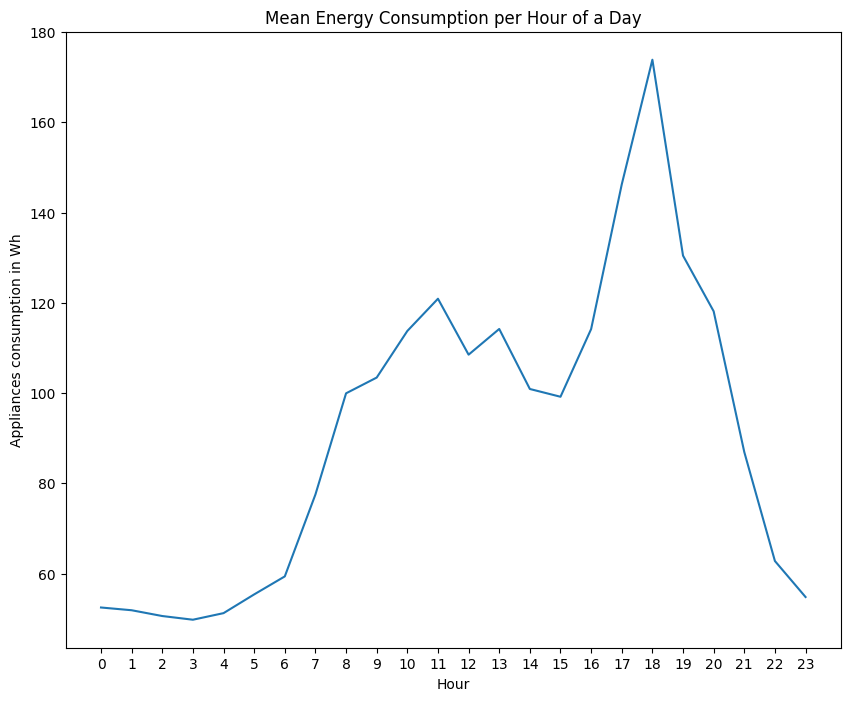

In [30]:
# Plot of Mean Energy Consumption per Hour of a Day

data.groupby('hours')['appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

High Electricity consumption of >140Wh is observed during evening hours 16:00 to 20:00. At night hours from 23:00-6:00 the power load is below 50Wh, meaning that most appliances are off or standby. Between 9:00-13:00 the power load is >100Wh and after launch reduces again to <100Wh. At afternoon, the energy consumption ranges from 130-185Wh as family members are at home and many devices are on. 

### Histogram of Appliance's consumption

/tmp/ipykernel_62354/101570789.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hour.appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
/tmp/ipykernel_62354/101570789.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hour.log_appliances, hist=True, color 

Text(0.5, 0, 'Appliances log(wH)')

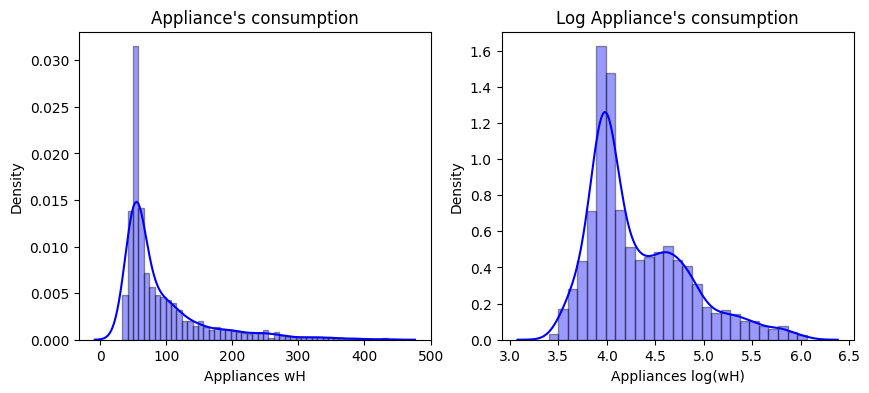

In [31]:
f, axes = plt.subplots(1, 2,figsize=(10,4))

sns.distplot(df_hour.appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's consumption")
axes[0].set_xlabel('Appliances wH')

sns.distplot(df_hour.log_appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Appliance's consumption")
axes[1].set_xlabel('Appliances log(wH)')

The distribution of power load is not normal as we have left asymetry, for this reason we shall use log(power load) which has closer to normal distribution for further analysis.

### Pearson Correlation among the variables

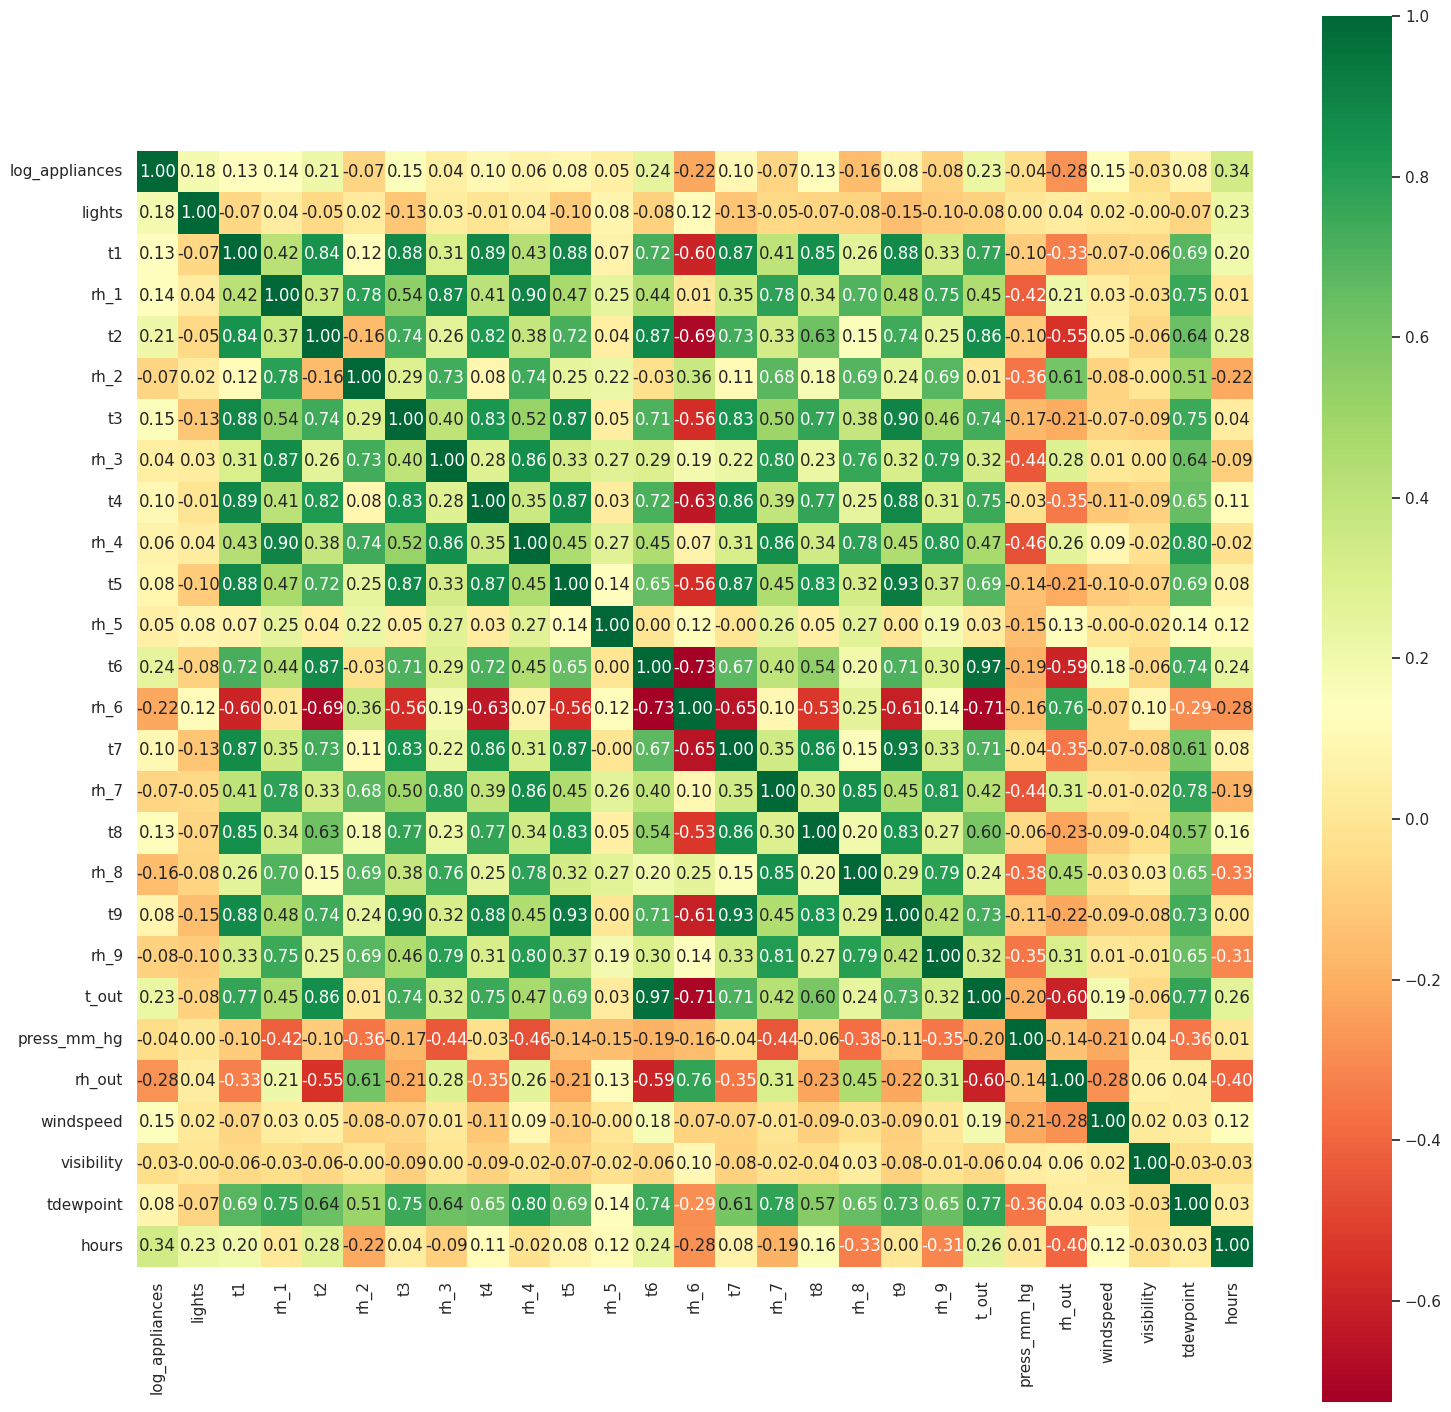

In [32]:

col = ['log_appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint','hours']
corr = data[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

The Energy consumption is highly correlated with:
    1. Hours : 0.34
    2. Lights : 0.26
    3. T2 : 0.22
    4. T6 : 0.26
    
Also all temperature values inside house are highly correlated with each other (> 0.8)

### Linear dependencey evaluation

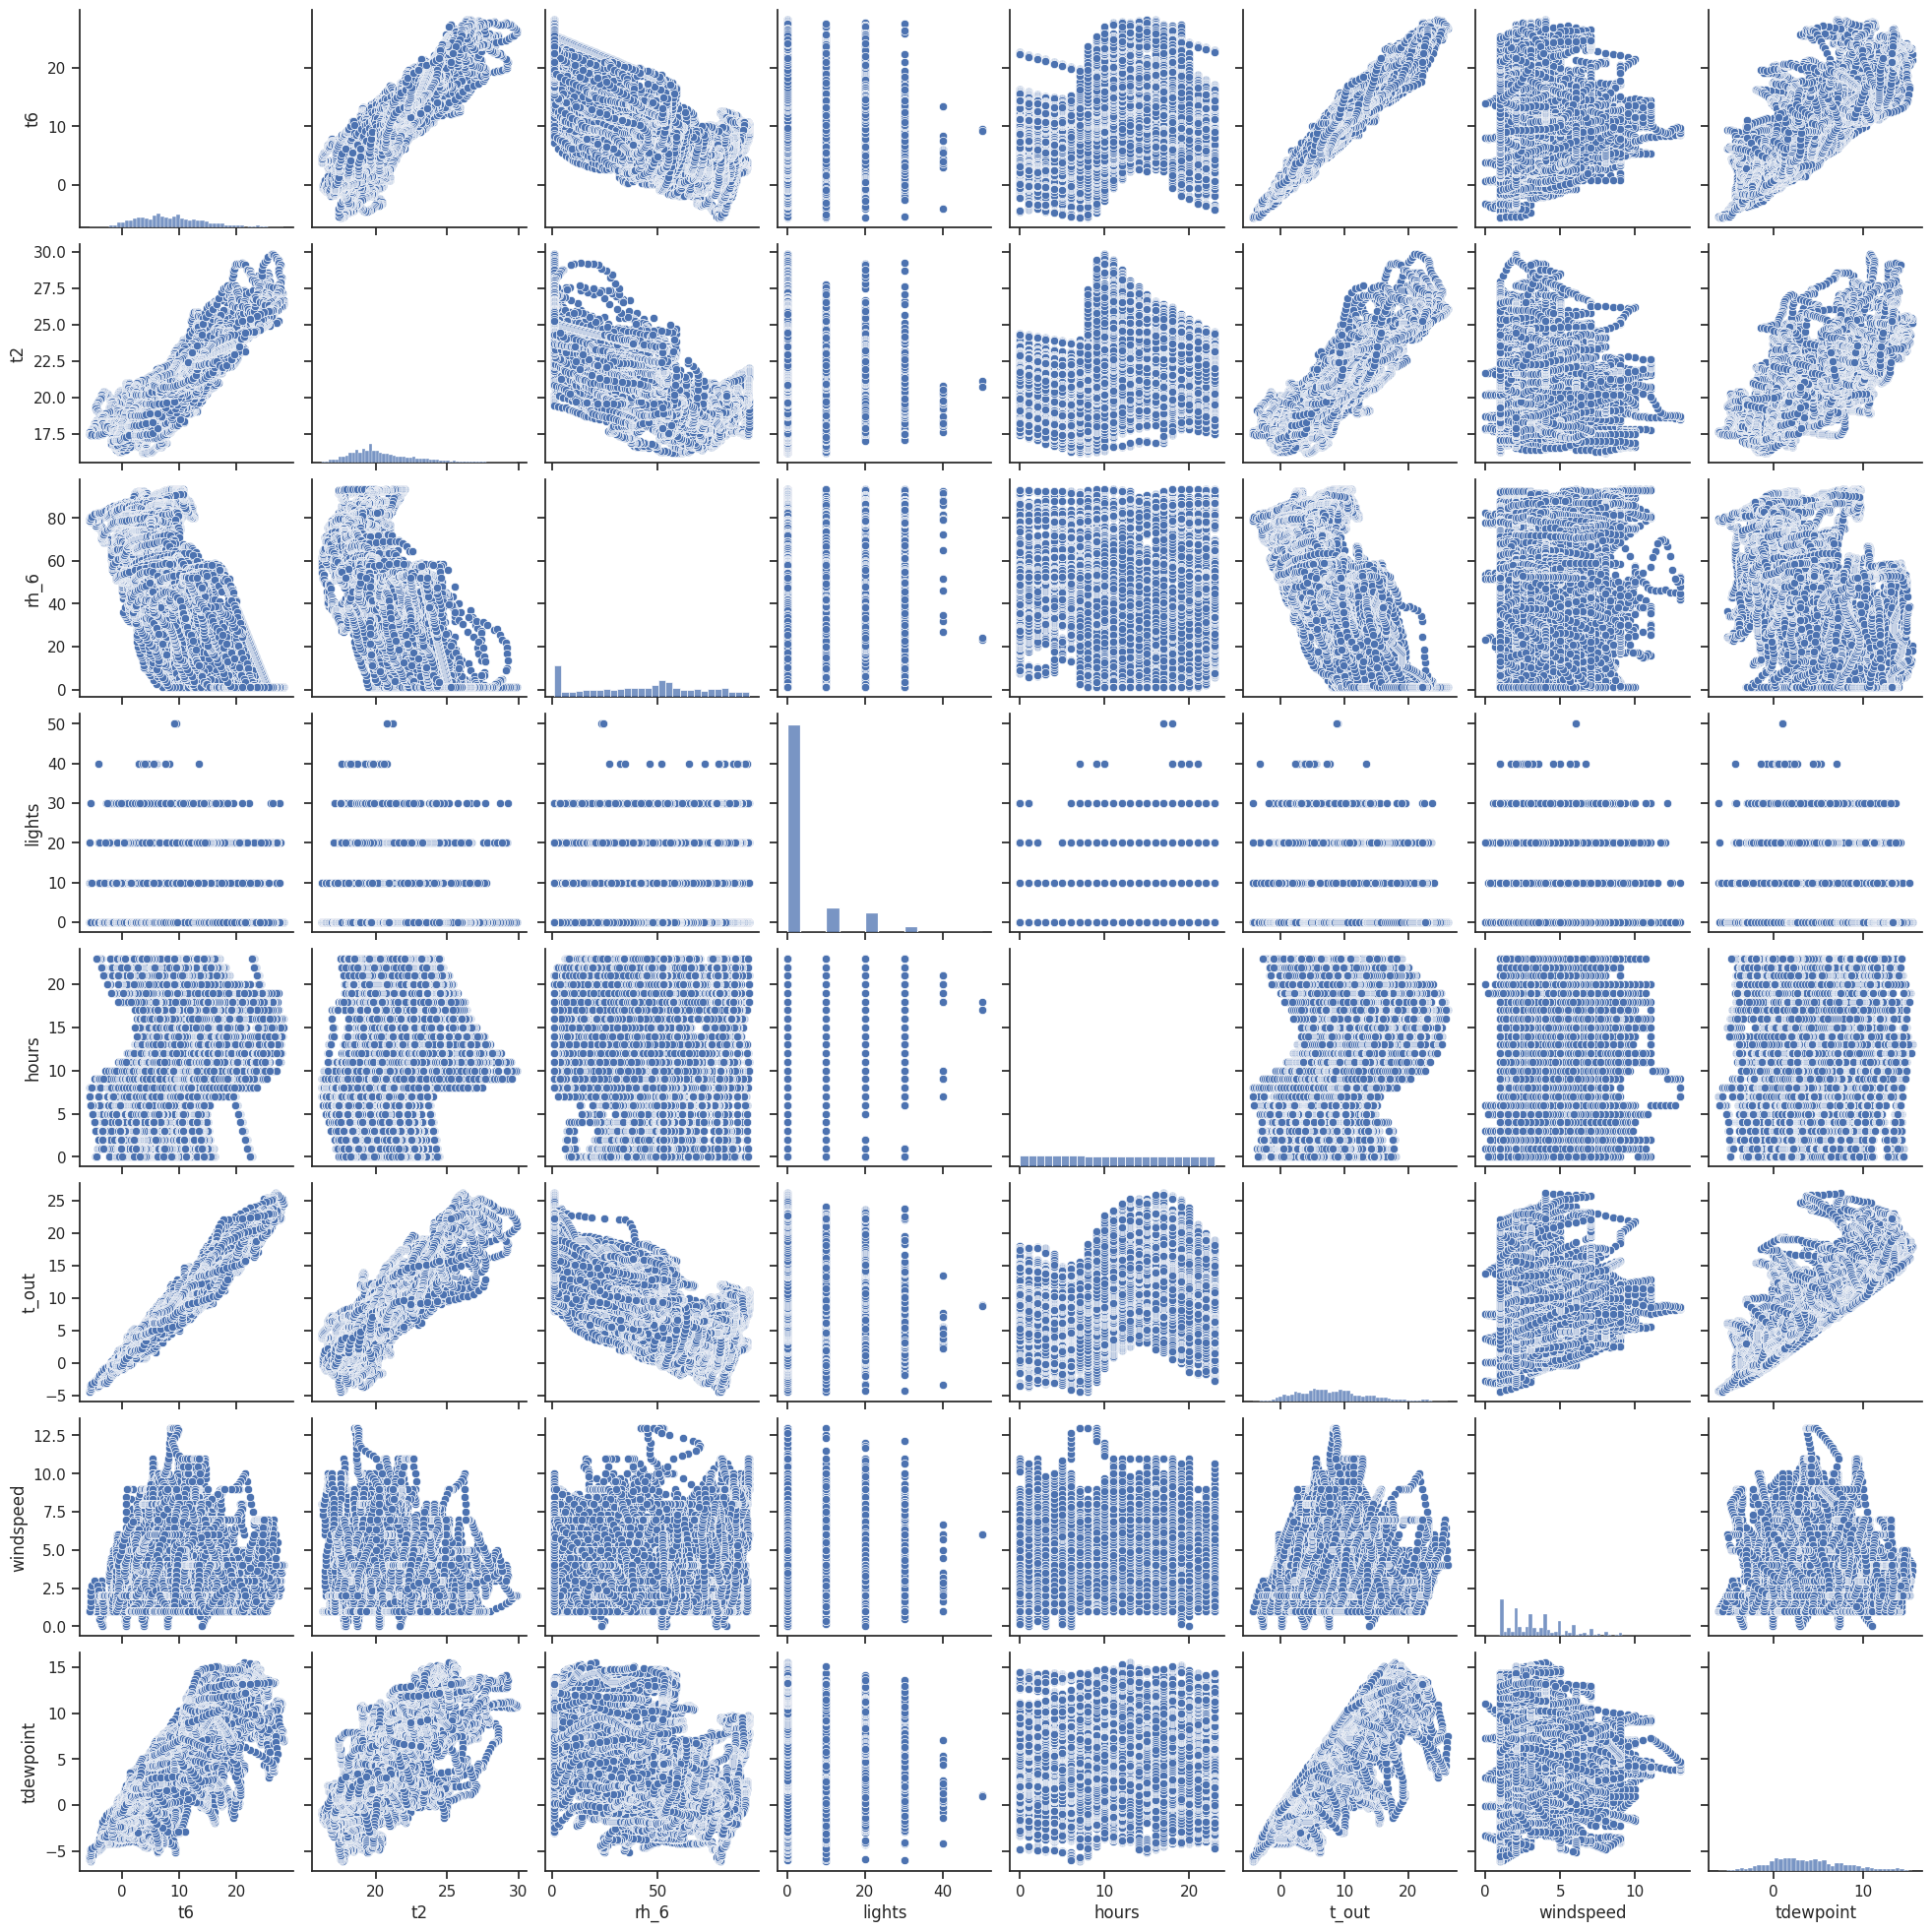

In [34]:
col = ['t6','t2', 'rh_6','lights','hours','t_out','windspeed','tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(data[col])
plt.show();

Inside temperatures, outside temperatures and tdewpoint have linear relationship. These features will best suite for Linear regression modelling.

### Transforming categorical variables 

In [35]:
for cat_feature in ['weekday', 'hours']:
    df_hour = pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])], axis=1)
    df_30min = pd.concat([df_30min, pd.get_dummies(df_30min[cat_feature])], axis=1)
    df = pd.concat([data, pd.get_dummies(data[cat_feature])], axis=1)

Generated 3 data sets with time interval 10 minutes, 30 minutes, 1 hour respectively. Using the 1 hour data set for further analysis as it having less noise.

## Modelling

Trying out 6 Regression models:
    1. LinearRegression
    2. SVR
    3. RandomForestRegressor
    4. LGBMRegressor
    5. XGBRegressor
    6. catboost

In [36]:
feature_set = ['low_consum','high_consum','hours','t6','rh_6','lights','hour*lights',
               'tdewpoint','visibility','press_mm_hg','windspeed']

In [50]:
len(feature_set)

11

In [37]:
# to avoid warnings from standardscaler
df_hour.lights = df_hour.lights.astype(float)
df_hour.log_appliances = df_hour.log_appliances.astype(float)
df_hour.hour = df_hour.hours.astype(float)
df_hour.low_consum = df_hour.low_consum.astype(float)
df_hour.high_consum = df_hour.high_consum.astype(float)

/tmp/ipykernel_62354/2665868572.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_hour.hour = df_hour.hours.astype(float)


In [38]:
# Creation of train/test sets
test_size=.2
test_index = int(len(df_hour.dropna())*(1-test_size))

X_train, X_test = df_hour[feature_set].iloc[:test_index,], df_hour[feature_set].iloc[test_index:,]
y_train = df_hour.log_appliances.iloc[:test_index,]

y_test =  df_hour.log_appliances.iloc[test_index:,]

In [49]:
X_train.shape

(1992, 11)

In [51]:
X_test.shape

(499, 11)

In [39]:
from sklearn.preprocessing import StandardScaler

# Normalizing of X matrices for each model to mean = 0 and standard deviation = 1

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train

array([[-0.61216109,  0.61216109, -1.66132477, ..., -1.20539885,
        -3.28495218, -0.6128931 ],
       [-0.61216109,  0.61216109, -1.51686175, ..., -1.87433329,
        -3.25390109, -0.53977494],
       [-0.61216109,  0.61216109, -1.37239873, ..., -1.01215113,
        -3.22165574, -0.79568848],
       ...,
       [-0.61216109,  0.61216109,  1.37239873, ..., -0.78174038,
        -0.50229743, -0.97848386],
       [-0.61216109,  0.61216109,  1.51686175, ...,  0.15476783,
        -0.49393752, -1.2343974 ],
       [-0.61216109,  0.61216109,  1.66132477, ...,  0.15476783,
        -0.49393752, -0.86880663]])

In [40]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [41]:
from sklearn import svm

svr_model = svm.SVR(gamma='scale')
svr_model.fit(X_train,y_train)

SVR()

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [27]:
import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
from catboost import CatBoostRegressor as cbr

model_lgb = lgb.LGBMRegressor(num_leaves=41, n_estimators=200)
model_lgb.fit(X_train, y_train)

LGBMRegressor(n_estimators=200, num_leaves=41)

In [28]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
model_cbr = cbr(random_seed=242, verbose=0, early_stopping_rounds=10)
model_cbr.fit(X_train, y_train)

In [47]:
X_train.shape

(1992, 11)

### Model Evaluation, Cross-validation & Selection

In [44]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Function to evaluate the models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [45]:
evaluate(lin_model, X_test, y_test)
evaluate(svr_model, X_test, y_test)
evaluate(rf_model, X_test, y_test)
# evaluate(model_lgb, X_test, y_test)
# evaluate(model_xgb, X_test, y_test)
# evaluate(model_cbr, X_test, y_test)

LinearRegression() 

Average Error       : 0.2872 degrees
Variance score R^2  : 32.74%
Accuracy            : 93.47%

SVR() 

Average Error       : 0.2593 degrees
Variance score R^2  : 33.76%
Accuracy            : 94.38%

RandomForestRegressor(random_state=1) 

Average Error       : 0.1996 degrees
Variance score R^2  : 65.74%
Accuracy            : 95.55%



In [32]:
#instead of KFold I use TimeSeriesSplit (10 splits) due to time series data
cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model:')
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('SVR Model:')
scores = cross_val_score(svr_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('Random Forest Model:')
scores = cross_val_score(rf_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('LGBMRegressor Model:')
scores = cross_val_score(model_lgb, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(model_lgb, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('XGBRegressor Model:')
scores = cross_val_score(model_xgb, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(model_xgb, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('CatBoostRegressor Model:')
scores = cross_val_score(model_cbr, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(model_cbr, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Linear Model:
Accuracy: 99.65 (+/- 0.16) degrees
R^2: 0.26 (+/- 0.30) degrees
SVR Model:
Accuracy: 99.71 (+/- 0.09) degrees
R^2: 0.48 (+/- 0.15) degrees
Random Forest Model:
Accuracy: 99.73 (+/- 0.22) degrees
R^2: 0.54 (+/- 0.54) degrees
LGBMRegressor Model:
Accuracy: 99.75 (+/- 0.09) degrees
R^2: 0.62 (+/- 0.17) degrees
XGBRegressor Model:
Accuracy: 99.73 (+/- 0.09) degrees
R^2: 0.58 (+/- 0.17) degrees
CatBoostRegressor Model:
Accuracy: 99.75 (+/- 0.10) degrees
R^2: 0.64 (+/- 0.14) degrees


Random Forest Model is having the best Accuracy and CatBoost is having the highest R^2.

## Model performance on test data

In [33]:
y1_pred = lin_model.predict(X_test)
y2_pred = svr_model.predict(X_test)
y3_pred = rf_model.predict(X_test)
y4_pred = model_lgb.predict(X_test)
y5_pred = model_xgb.predict(X_test)
y6_pred = model_cbr.predict(X_test)

Text(0.5, 0.01, 'Fitted Values')

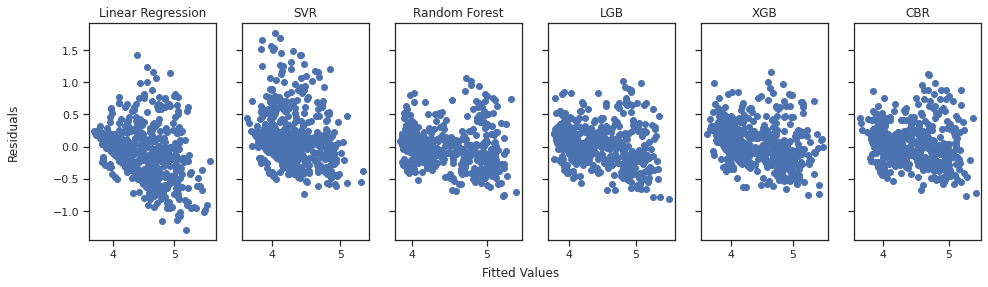

In [34]:
fig, axs = plt.subplots(1, 6, figsize=(16,4), sharey=True)
axs[0].scatter(y1_pred,y_test-y1_pred)
axs[0].set_title('Linear Regression')
axs[1].scatter(y2_pred,y_test-y2_pred)
axs[1].set_title('SVR')
axs[2].scatter(y3_pred,y_test-y3_pred)
axs[2].set_title('Random Forest')
axs[3].scatter(y4_pred,y_test-y4_pred)
axs[3].set_title('LGB')
axs[4].scatter(y5_pred,y_test-y5_pred)
axs[4].set_title('XGB')
axs[5].scatter(y6_pred,y_test-y6_pred)
axs[5].set_title('CBR')
fig.text(0.06, 0.5, 'Residuals', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Fitted Values', ha='center', va='center')

RF, LGB, XGB, CBR models appears to has mean random residuals close to 0 and constant standard deviation.

Text(0.5, 0.01, 'True Values')

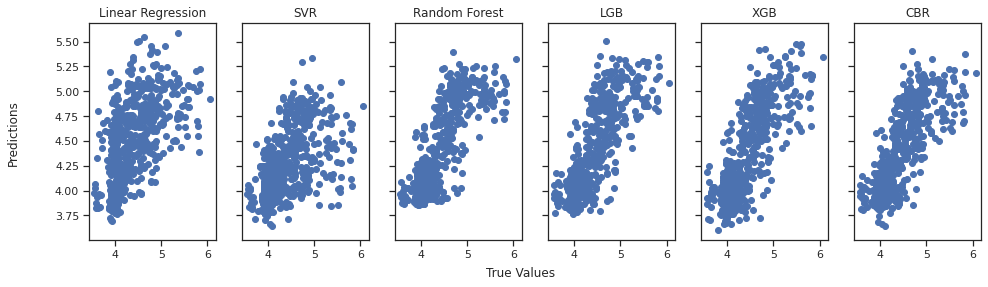

In [35]:
fig, axs = plt.subplots(1, 6, figsize=(16,4), sharey=True)
axs[0].scatter(y_test,y1_pred)
axs[0].set_title('Linear Regression')
axs[1].scatter(y_test,y2_pred)
axs[1].set_title('SVR')
axs[2].scatter(y_test, y3_pred)
axs[2].set_title('Random Forest')
axs[3].scatter(y_test, y4_pred)
axs[3].set_title('LGB')
axs[4].scatter(y_test, y5_pred)
axs[4].set_title('XGB')
axs[5].scatter(y_test, y6_pred)
axs[5].set_title('CBR')
fig.text(0.06, 0.5, 'Predictions', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'True Values', ha='center', va='center')

XGB model appears to be the one which predicts high and low values of energy consumption.

### Prediction of each model vs Test data

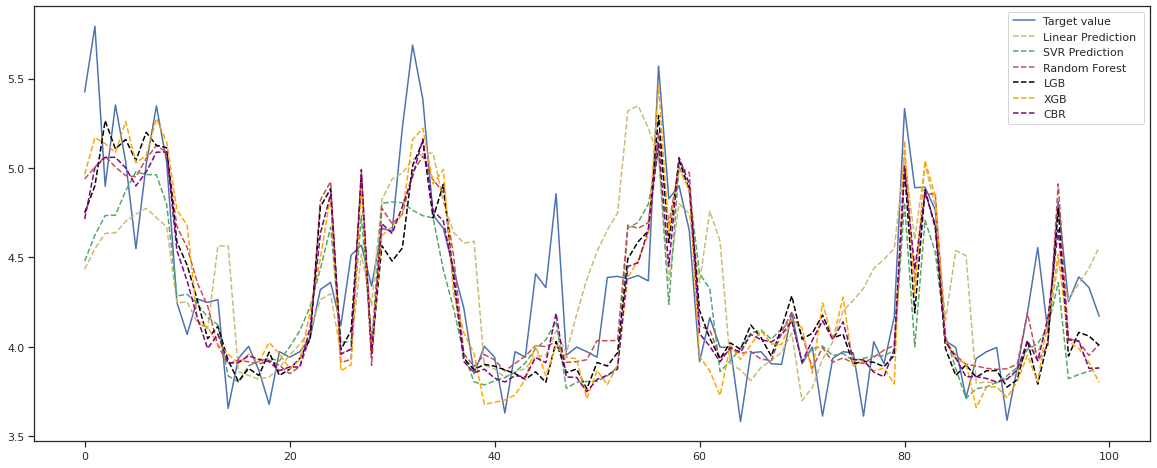

In [36]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y1_pred[:100],label='Linear Prediction ', linestyle='--', color='y')
plt.plot(y2_pred[:100],label='SVR Prediction ', linestyle='--', color='g')
plt.plot(y3_pred[:100],label='Random Forest', linestyle='--', color='r')
plt.plot(y4_pred[:100],label='LGB', linestyle='--', color='black')
plt.plot(y5_pred[:100],label='XGB', linestyle='--', color='orange')
plt.plot(y6_pred[:100],label='CBR', linestyle='--', color='purple')

plt.legend(loc=1)

XBG is predicitng highs and lows better than other models. Overall Random Forest appears to closely fit with the test data.

### Parameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV, KFold

parameters = {
    'max_depth': [800,1000,1500],
    'min_samples_leaf': [5,8,10],
    'min_samples_split': [5,10,15],
    'n_estimators': [40,60,100],
    'random_state':[1]    
}

cv =cv
grid_model = GridSearchCV(RandomForestRegressor(), parameters, cv=cv)

grid_model = grid_model.fit(X_train, y_train)
print(grid_model.best_estimator_)
print(grid_model.best_params_)

RandomForestRegressor(max_depth=800, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=60, random_state=1)
{'max_depth': 800, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 60, 'random_state': 1}


In [38]:
best_rf_model = grid_model.best_estimator_
grid_accuracy = evaluate(grid_model, X_test, y_test)
y_best_pred = best_rf_model.predict(X_test)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [800, 1000, 1500],
                         'min_samples_leaf': [5, 8, 10],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [40, 60, 100], 'random_state': [1]}) 

Average Error       : 0.1909 degrees
Variance score R^2  : 68.26%
Accuracy            : 95.77%



#### The Variance score of the model impoved from 65% to 68.26%.

### Final predictions on test set based on best RF model

In [39]:
# Calculate Confidence interval 95% for the predictions
sum_errs = np.sum((y_test - y_best_pred)**2)
stdev = np.sqrt(1/(len(df_hour)-2) * sum_errs)

interval = 1.96 * stdev #95% CI
lower, upper = y_best_pred - interval, y_best_pred + interval

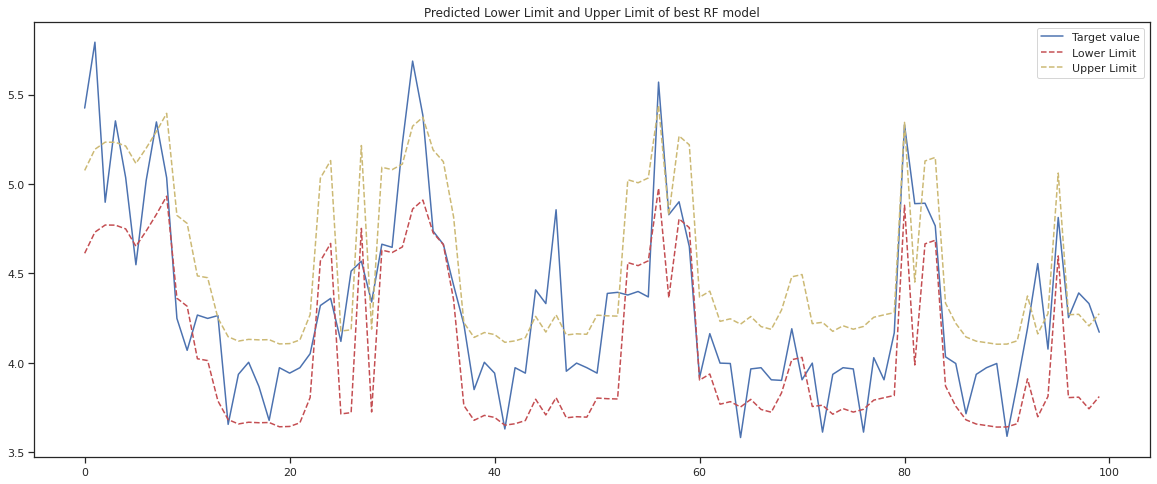

In [40]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
#plt.plot(y_pred,label='Best Tree Prediction ', linestyle='-', color='b')
plt.plot(lower[:100],label='Lower Limit ', linestyle='--', color='r')
plt.plot(upper[:100],label='Upper Limit ', linestyle='--', color='y')
plt.title('Predicted Lower Limit and Upper Limit of best RF model')

plt.legend(loc=1)

### Factors influencing energy consumption

In [41]:
factor_list = feature_set
factors = np.array(X_test)

importances = list(rf_model.feature_importances_)

factor_importances = [(factor, round(importance, 2)) 
    for factor, importance in zip(factor_list, importances)]

factor_importances = sorted(factor_importances, key = lambda X_test: X_test[1], reverse = True)
 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in factor_importances];

Variable: hours                Importance: 0.46
Variable: high_consum          Importance: 0.21
Variable: rh_6                 Importance: 0.06
Variable: low_consum           Importance: 0.04
Variable: t6                   Importance: 0.04
Variable: hour*lights          Importance: 0.04
Variable: tdewpoint            Importance: 0.04
Variable: press_mm_hg          Importance: 0.04
Variable: visibility           Importance: 0.03
Variable: windspeed            Importance: 0.03
Variable: lights               Importance: 0.01


Text(0.5, 1.0, 'Factors influencing energy consumption')

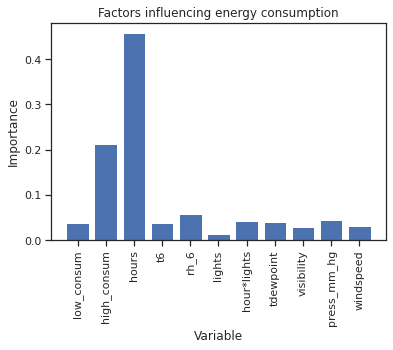

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, factor_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable')
plt.title('Factors influencing energy consumption')


#### Hour of the Day is the important influencing parameter for Energy consumption.

## Observations and motivation for next steps

### Observations:
    1. Hour of the Day is the most important influencing parameter for Energy consumption
    2. XBG is predicitng highs and lows better than other models, 
    3. Overall Random Forest appears to closely fit with the test data
    4. High Electricity consumption of >140Wh is observed during evening hours 16:00 to 20:00
    5. Weekends (Saturdays and Sundays) are observed to have high consumption of Electricity. (> 25% than Weekdays)
    6. Though light consumpstion appeared as highly correlated with Appliance electricity consumption, lights are having very low importance as a feature

### Motivation for future steps:
    1. Available data is only for 1 house, we learn important information if we analyse several houses 
    2. Further informations like House geometry, number of people residing at house over time may give few more insights
    3. Need to capture data for several months to bring in seasonal effects on energy consumption
    4. Optimal positioning and quality of sensors can be analysed for better data capturing
    5. The predictions of appliances energy use could probably be better if the weather station was closer to the house
    6. Noise and CO2 level in the room can also be an important data for improving predictions

## References
    [1] Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788.
    [2] N. Arghira, L. Hawarah, S. Ploix, M. Jacomino, Prediction of appliances energy use in smart homes, Energy 48 (1) (2012) 128–134.
    [3] M. Muratori, M.C. Roberts, R. Sioshansi, V. Marano, G. Rizzoni, A highly resolved modeling technique to simulate residential power demand, Appl. Energy 107 (2013) 465–473.
    [4] Saleh Seyedzadeh, Farzad Pour Rahimian, Ivan Glesk & Marc Roper, Machine learning for estimation of building energy consumption and performance: a review, Visualization in Engineering volume 6, Article number: 5 (2018) 